<a href="https://colab.research.google.com/github/KostantinDubnitskyi/Methodd/blob/main/%D0%9B%D1%80_9_(%D0%94%D1%83%D0%B1%D0%BD%D0%B8%D1%86%D1%8C%D0%BA%D0%B8%D0%B9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Сплайни
1 варіант

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

Побудова кубічного сплайну

In [ ]:
import numpy as np

x = np.array([0.1, 0.3, 0.6, 1.1, 1.8])
y = np.array([2.65, 2.75, 2.19, 1.76, 3.43])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n + 1)

alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n + 1)
mu = np.zeros(n)
z = np.zeros(n + 1)

for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

l[n] = 1
z[n] = 0
c[n] = 0

for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]:.4f} + {b[i]:.4f}(x - {x[i]}) + {c[i]:.4f}(x - {x[i]})^2 + {d[i]:.4f}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

Відрізок 1:
S_0(x) = 2.6500 + 1.0177(x - 0.1) + 0.0000(x - 0.1)^2 + -12.9435(x - 0.1)^3, x належить [0.1, 0.3]
Відрізок 2:
S_1(x) = 2.7500 + -0.5355(x - 0.3) + -7.7661(x - 0.3)^2 + 11.0960(x - 0.3)^3, x належить [0.3, 0.6]
Відрізок 3:
S_2(x) = 2.1900 + -2.1992(x - 0.6) + 2.2203(x - 0.6)^2 + 0.9162(x - 0.6)^3, x належить [0.6, 1.1]
Відрізок 4:
S_3(x) = 1.7600 + 0.7082(x - 1.1) + 3.5946(x - 1.1)^2 + -1.7117(x - 1.1)^3, x належить [1.1, 1.8]


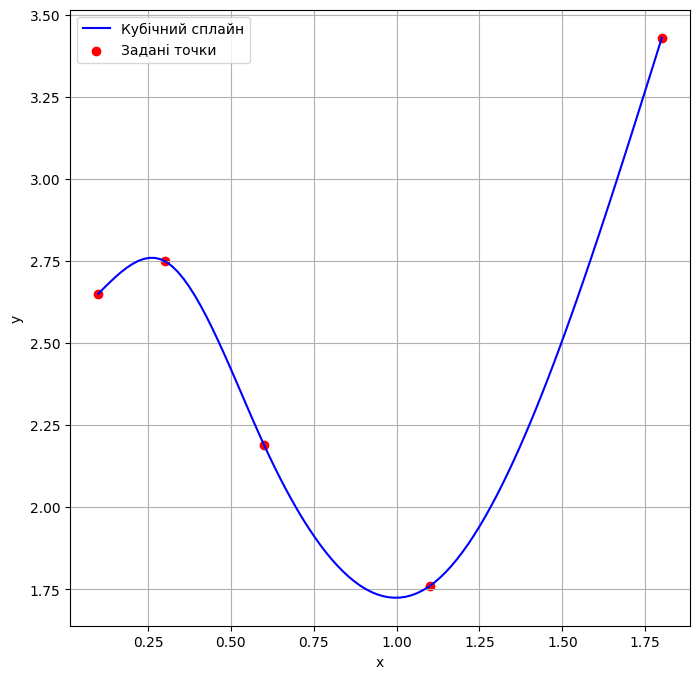

In [ ]:
 #Графік
x_values = np.linspace(np.min(x), np.max(x), 100)
y_values = [ ]

for i in range(n):
    mask = (x_values >= x[i]) & (x_values <= x[i + 1])
    x_interval = x_values[mask]
    y_interval = a[i] + b[i] * (x_interval - x[i]) + c[i] * (x_interval - x[i]) ** 2 + d[i] * (x_interval - x[i]) ** 3
    y_values.extend(y_interval)

plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label="Кубічний сплайн", color='b')
plt.scatter(x, y, label="Задані точки", color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

2 варіант

Перевірка за допомогою методу **CubicSpline**

In [ ]:
from scipy.interpolate import CubicSpline

# Вхідні дані
x = np.array([0.1, 0.3, 0.6, 1.1, 1.8])
y = np.array([2.65, 2.75, 2.19, 1.76, 3.43])

# Побудова кубічного сплайну
cs = CubicSpline(x, y)

# Виведення коефіцієнтів сплайну для кожного відрізка
for i in range(len(x)-1):
    coeffs = cs.c[:, i]  # Коефіцієнти для i-го інтервалу
    spline = f'S_{i+1}(x) = {coeffs[0]:.4f}*(x - {x[i]})^3 + {coeffs[1]:.4f}*(x - {x[i]})^2 + {coeffs[2]:.4f}*(x - {x[i]}) + {coeffs[3]:.4f}'
    print(spline)

S_1(x) = 8.5567*(x - 0.1)^3 + -10.7230*(x - 0.1)^2 + 2.3023*(x - 0.1) + 2.6500
S_2(x) = 8.5567*(x - 0.3)^3 + -5.5890*(x - 0.3)^2 + -0.9601*(x - 0.3) + 2.7500
S_3(x) = 0.3487*(x - 0.6)^3 + 2.1120*(x - 0.6)^2 + -2.0032*(x - 0.6) + 2.1900
S_4(x) = 0.3487*(x - 1.1)^3 + 2.6350*(x - 1.1)^2 + 0.3703*(x - 1.1) + 1.7600


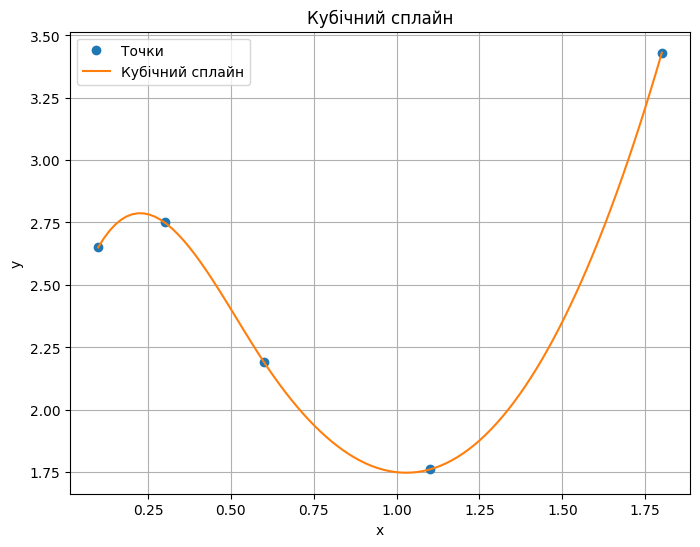

In [ ]:
# Побудова кубічного сплайна
cs = CubicSpline(x, y)

# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()

3 Варіант

Побудован сплайну

In [ ]:
def gauss(A, b):
    n = len(b)
    for i in range(n):
        max_row = max(range(i, n), key=lambda r: abs(A[r][i]))
        A[i], A[max_row] = A[max_row], A[i]
        b[i], b[max_row] = b[max_row], b[i]

        for j in range(i+1, n):
            factor = A[j][i] / A[i][i]
            b[j] -= factor * b[i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]

    x = [0 for _ in range(n)]
    for i in range(n-1, -1, -1):
        sum_ax = sum(A[i][j] * x[j] for j in range(i+1, n))
        x[i] = (b[i] - sum_ax) / A[i][i]
    return x

x = [0.1, 0.3, 0.6, 1.1, 1.8]
f = [2.65, 2.75, 2.19, 1.76, 3.43]

d = len(x)

s = [0]*4*(d-1)
A = []
for i in range(4*(d-1)):
    A.append(s[:])
b = s[:]

for j in range(d-1):
    for i in range(4):
        A[j][i+4*j] = (x[j]-x[j+1])**i
    b[j] = f[j]

for j in range(d-1, 2*(d-1)):
    A[j][4*(j-(d-1))] = 1
    b[j] = f[j-(d-1)+1]

for j in range(2*(d-1), 3*d-4):
    for i in range(4):
        if i == 0:
            A[j][1+4*(j-2*(d-1))] = -1
        else:
            A[j][i+4+4*(j-2*(d-1))] = i*(x[1+(j-2*(d-1))]-x[2+(j-2*(d-1))])**(i-1)

for j in range(3*d-4, 4*d-6):
    A[j][2+4*(j-(3*d-4))] = -2
    A[j][6+4*(j-(3*d-4))] = 2
    A[j][7+4*(j-(3*d-4))] = 6*(x[1+j-(3*d-4)]-x[2+j-(3*d-4)])

A[4*d-6][2] = 2
A[4*d-6][3] = 6*(x[0]-x[1])
A[4*d-5][-2] = 2

c = gauss(A, b)

print('Сплайни')
for j in range(d-1):
    spline = 'S_' + str(j+1) + '(x) = ' + str(c[0+4*j]) + '+'
    for i in range(1, 4):
        spline += str(c[i+4*j]) + '*(x-' + str(x[j]) + ')^' + str(i) + '+'
    spline = spline[:-1].replace('+-', '-').replace('^1', '')
    spline += ', на [' + str(x[j]) + ';' + str(x[j+1]) + ']'
    print(spline)

Сплайни
S_1(x) = 2.75-0.5354802833996666*(x-0.1)-7.766102125497505*(x-0.1)^2-12.943503542495842*(x-0.1)^3, на [0.1;0.3]
S_2(x) = 2.19-2.1992087955514164*(x-0.3)+2.2203404183250077*(x-0.3)^2+11.096047270913903*(x-0.3)^3, на [0.3;0.6]
S_3(x) = 1.7599999999999998+0.7082473819403288*(x-0.6)+3.5945719366584807*(x-0.6)^2+0.9161543455556483*(x-0.6)^3, на [0.6;1.1]
S_4(x) = 3.43+3.224447737601265*(x-1.1)+0.0*(x-1.1)^2-1.7117009222183244*(x-1.1)^3, на [1.1;1.8]
